In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from scipy.stats import linregress
import scipy.stats as sem
# from config import api_key

In [2]:
# Import school data
school_2015_data = "chi_school_2015_2016.csv"
school_2015_df = pd.read_csv(school_2015_data)
school_2015_df = school_2015_df[school_2015_df['Primary_Category'] == 'HS']
school_2015_df = school_2015_df[['Zip','Student_Attendance_Year_2_Pct','College_Enrollment_School_Pct_Year_2']]
school_2015_df = school_2015_df.dropna()
#school_2015_df
school_2015_group2_df = school_2015_df.groupby('Zip').mean()
school_2015_group2_df.reset_index(inplace=True)
school_2015_group2_df.head()

,Zip,Student_Attendance_Year_2_Pct,College_Enrollment_School_Pct_Year_2
0,60602,84.250000,59.250000
1,60605,93.800000,87.600000
2,60607,94.200000,72.950000
3,60608,83.490000,44.950000
4,60609,87.016667,36.516667


In [3]:
# File to Load (Remember to Change These)
school_data = "cleaned_school_data.csv"
school_data_df = pd.read_csv(school_data)
school_data_df.head()


,Unnamed: 0,School ID,Year_x,"Elementary, Middle, or High School",ZIP Code,Average Student Attendance,College Enrollment Rate %,Population
0,2,609680,2011,HS,60610,93.4,82.4,70268.0
1,5,609722,2011,HS,60612,66.8,51.9,35013.0
2,8,609749,2011,HS,60625,95.7,90.7,53233.0
3,11,610244,2011,HS,60644,79.1,60.4,28235.0
4,14,610394,2011,HS,60640,88.7,65.0,44964.0


In [4]:
# Group by year for the school data
yeah_school_df = school_data_df.groupby(['Year_x'])
#yeah_school_df = yeah_school_df["Average Student Attendance","College Enrollment Rate %"]

In [5]:
# Determine mean of attendance and college enrollment
attendance = yeah_school_df["Average Student Attendance"].mean()
college_rate = yeah_school_df["College Enrollment Rate %"].mean()

In [6]:
# Create a dataframe with the attendance and college enrollment averages
rate_df = pd.DataFrame({
    "attendance": attendance,
    "college rate": college_rate
})

rate_df

,attendance,college rate
Year_x,,
2011,83.563441,57.092473
2015,88.771170,52.447872
2021,84.563486,57.145714


In [7]:
# Create lists for student attendance and college enrollment rate
attend = school_data_df["Average Student Attendance"]
c_rate = school_data_df["College Enrollment Rate %"]

The r-squared is: 0.22880616298410816


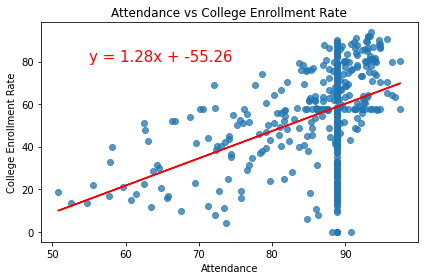

In [8]:
# Plot the college enrollment rate versus attendance.  
x_values = attend
y_values = c_rate
plt.scatter(attend,c_rate,marker='o',alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,80),fontsize=15,color="red")
plt.title("Attendance vs College Enrollment Rate")
plt.xlabel('Attendance')
plt.ylabel('College Enrollment Rate')
plt.tight_layout()
plt.savefig("Images/attendance_v_college_acceptance_rate.png")
plt.show()

In [84]:
# Calculate Pearson Correlation Coefficient
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is 0.48



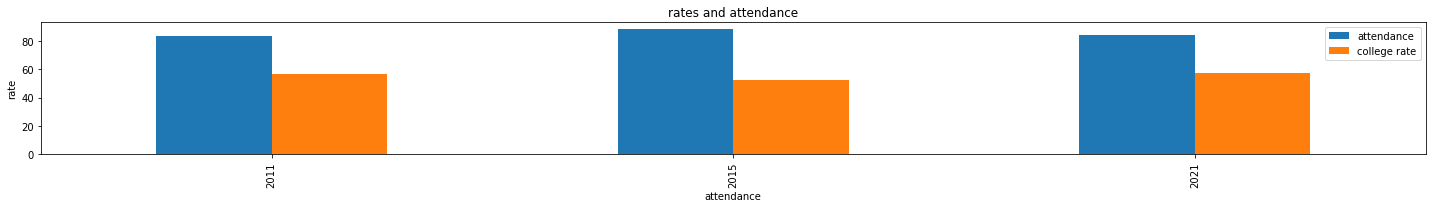

In [12]:
# Create bar plot showing average attendance and college enrollment rate for each year
rate_df.plot(kind="bar",figsize=(20,3),)
y = rate_df["college rate"]
plt.title("rates and attendance")
plt.ylabel("rate")
plt.xlabel("attendance")
plt.tight_layout()
plt.savefig("Images/Bar_Chart_Attendance_College_Rate.png")
plt.show()

In [13]:
# Create dataframes for each year of school data
school_2011_df = school_data_df[school_data_df['Year_x'] == 2011]
school_2015_df = school_data_df[school_data_df['Year_x'] == 2015]
school_2021_df = school_data_df[school_data_df['Year_x'] == 2021]

In [14]:
# Group the school data by zip code for 2011 school data
grouped_zips_2011_df = school_2011_df.groupby('ZIP Code').mean()
grouped_zips_2011_df.reset_index(inplace=True)
grouped_zips_2011_df = grouped_zips_2011_df[['ZIP Code', 'Year_x',
       'Average Student Attendance', 'College Enrollment Rate %',
       'Population']]
grouped_zips_2011_df.head()

,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,60605,2011.0,93.800000,86.9,75030.0
1,60607,2011.0,94.600000,88.3,79242.0
2,60608,2011.0,83.700000,48.8,35477.0
3,60609,2011.0,87.433333,45.9,34725.0
4,60610,2011.0,93.400000,82.4,70268.0


In [15]:
# Group the school data by zip code for 2015 school data
grouped_zips_2015_df = school_2015_df.groupby('ZIP Code').mean()
grouped_zips_2015_df.reset_index(inplace=True)
grouped_zips_2015_df = grouped_zips_2015_df[['ZIP Code', 'Year_x',
       'Average Student Attendance', 'College Enrollment Rate %',
       'Population']]
grouped_zips_2015_df.head()

,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,60602,2015.0,88.8,59.550000,57368.0
1,60605,2015.0,88.8,88.500000,87668.0
2,60607,2015.0,88.8,79.300000,85917.0
3,60608,2015.0,88.8,44.272727,36216.0
4,60609,2015.0,88.8,40.628571,32284.0


In [16]:
# Group the school data by zip code for 2021 school data
grouped_zips_2021_df = school_2021_df.groupby('ZIP Code').mean()
grouped_zips_2021_df.reset_index(inplace=True)
grouped_zips_2021_df = grouped_zips_2021_df[['ZIP Code', 'Year_x',
       'Average Student Attendance', 'College Enrollment Rate %',
       'Population']]
grouped_zips_2021_df.head()

,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,60602,2021.0,72.7000,54.3500,33273.0
1,60605,2021.0,91.3000,86.4000,102572.0
2,60607,2021.0,90.3950,73.0000,92790.0
3,60608,2021.0,77.4625,43.9875,36940.0
4,60609,2021.0,85.8400,51.8800,30024.0


Pull In Crime Data

In [42]:
# Import the crime data for each year
crime_data_2011 = "crimes_rate_2011.csv"
crime_rate_2011_df = pd.read_csv(crime_data_2011)
crime_data_2015 = "crimes_rate_2015.csv"
crime_rate_2015_df = pd.read_csv(crime_data_2015)
crime_data_2021 = "crimes_rate_2021.csv"
crime_rate_2021_df = pd.read_csv(crime_data_2021)
crime_rate_2015_df.head()

,Unnamed: 0,Zip Code,Count of Crimes,2015,Crime Rate Per 100 People
0,0,60602,5148,57368.0,8.973644
1,1,60605,2341,87668.0,2.670302
2,2,60607,3016,85917.0,3.510365
3,3,60608,3247,36216.0,8.965651
4,4,60609,3666,32284.0,11.355470


In [58]:
# Merge the school data with the crime data on zip code
crime_school_2011_df = crime_rate_2011_df.merge(grouped_zips_2011_df, left_on="Zip Code", right_on="ZIP Code")
crime_school_2015_df = crime_rate_2015_df.merge(school_2015_group2_df, left_on="Zip Code", right_on="Zip")
crime_school_2021_df = crime_rate_2021_df.merge(grouped_zips_2021_df, left_on="Zip Code", right_on="ZIP Code")


In [59]:
# Verify 2011 dataframe
crime_school_2011_df.head()

,Unnamed: 0,Zip Code,Count of Crimes,2011,Crime Rate Per 100 People,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,1,60605,2394,75030.0,3.190724,60605,2011.0,93.800000,86.9,75030.0
1,2,60607,3946,79242.0,4.979682,60607,2011.0,94.600000,88.3,79242.0
2,3,60608,4324,35477.0,12.188178,60608,2011.0,83.700000,48.8,35477.0
3,4,60609,4936,34725.0,14.214543,60609,2011.0,87.433333,45.9,34725.0
4,5,60610,3396,70268.0,4.832925,60610,2011.0,93.400000,82.4,70268.0


In [60]:
# Verify 2015 dataframe
crime_school_2015_df.head()

,Unnamed: 0,Zip Code,Count of Crimes,2015,Crime Rate Per 100 People,Zip,Student_Attendance_Year_2_Pct,College_Enrollment_School_Pct_Year_2
0,0,60602,5148,57368.0,8.973644,60602,84.250000,59.250000
1,1,60605,2341,87668.0,2.670302,60605,93.800000,87.600000
2,2,60607,3016,85917.0,3.510365,60607,94.200000,72.950000
3,3,60608,3247,36216.0,8.965651,60608,83.490000,44.950000
4,4,60609,3666,32284.0,11.355470,60609,87.016667,36.516667


In [61]:
# Verify 2021 dataframe
crime_school_2021_df.head()

,Unnamed: 0,Zip Code,Count of Crimes,2021,Crime Rate Per 100 People,ZIP Code,Year_x,Average Student Attendance,College Enrollment Rate %,Population
0,0,60602,2963,33273.0,8.905118,60602,2021.0,72.7000,54.3500,33273.0
1,1,60605,2230,102572.0,2.174083,60605,2021.0,91.3000,86.4000,102572.0
2,2,60607,2892,92790.0,3.116715,60607,2021.0,90.3950,73.0000,92790.0
3,3,60608,2654,36940.0,7.184624,60608,2021.0,77.4625,43.9875,36940.0
4,4,60609,2507,30024.0,8.349987,60609,2021.0,85.8400,51.8800,30024.0


Run regression analysis for 2011

In [63]:
# def regresion_chart(x,y):
# x_values = crime_school_2011_df["Average Student Attendance"]
# y_values = crime_school_2011_df["Crime Rate Per 100 People"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(80,50),fontsize=15,color="red")
# plt.title("crime rate vs attendance")
# plt.xlabel('attendance')
# plt.ylabel('crime rate')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

The r-squared is: 0.25505603413025274


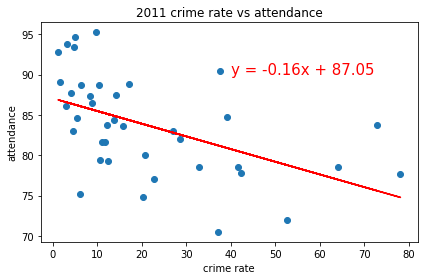

In [64]:
# Plot 2011 Attendance vs Crime Rate and Run Regression Analysis
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["Average Student Attendance"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 90),fontsize=15,color="red")
plt.title("2011 crime rate vs attendance")
plt.xlabel('crime rate')
plt.ylabel('attendance')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/2011_Attendance_v_Crime.png")
plt.show()


In [65]:
# Calculate Pearson Correlation Coefficient
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["Average Student Attendance"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")


The Pearson Correlation Coefficient is -0.51



The r-squared is: 0.05349069100061563


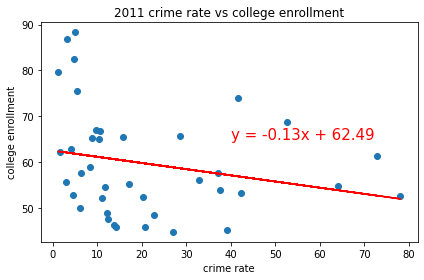

In [66]:
# Plot 2011 Graduation Rate vs Crime Rate and Run Regression
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["College Enrollment Rate %"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,65),fontsize=15,color="red")
plt.title("2011 crime rate vs college enrollment")
plt.xlabel('crime rate')
plt.ylabel('college enrollment')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/2011_College_Enrollment_v_Crime.png")
plt.show()

In [67]:
# Calculate Pearson Correlation Coefficient
x_values = crime_school_2011_df["Crime Rate Per 100 People"]
y_values = crime_school_2011_df["College Enrollment Rate %"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.23



Run regression analysis for 2015

The r-squared is: 0.23120303401316145


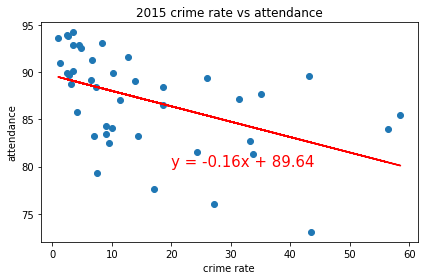

In [68]:
# Plot 2015 Attendance vs Crime Rate and Run Regression
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["Student_Attendance_Year_2_Pct"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="red")
plt.title("2015 crime rate vs attendance")
plt.xlabel('crime rate')
plt.ylabel('attendance')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/2015_Attendance_v_Crime.png")
plt.show()

In [69]:
# Calculate Pearson Correlation Coefficient
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["Student_Attendance_Year_2_Pct"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.48



The r-squared is: 0.18773879893663692


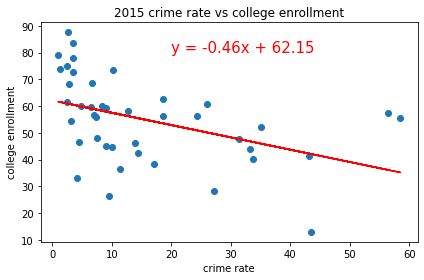

In [70]:
# Plot 2015 College Enrollment vs Crime Rate and Run Regression
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["College_Enrollment_School_Pct_Year_2"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="red")
plt.title("2015 crime rate vs college enrollment")
plt.xlabel('crime rate')
plt.ylabel('college enrollment')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/2015_College_Enrollment_v_Crime.png")
plt.show()

In [71]:
# Calculate Pearson Correlation Coefficient
x_values = crime_school_2015_df["Crime Rate Per 100 People"]
y_values = crime_school_2015_df["College_Enrollment_School_Pct_Year_2"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.43



Run regression analysis for 2021

The r-squared is: 0.14498919444088776


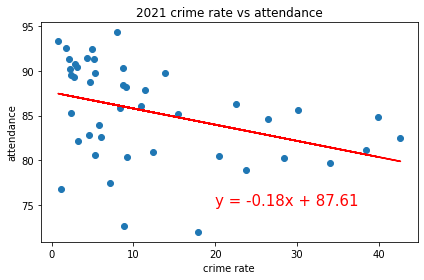

In [72]:
# Plot 2021 Attendance vs Crime Rate and Run Regression
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["Average Student Attendance"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.title("2021 crime rate vs attendance")
plt.xlabel('crime rate')
plt.ylabel('attendance')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/2021_Attendance_v_Crime.png")
plt.show()

In [65]:
# Calculate Pearson Correlation Coefficient
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["Average Student Attendance"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.39



The r-squared is: 0.2095514903972171


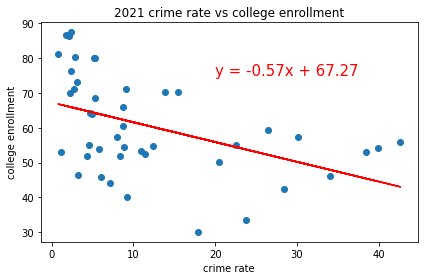

In [39]:
# Plot 2021 College Enrollment vs Crime Rate and Run Regression
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["College Enrollment Rate %"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.title("2021 crime rate vs college enrollment")
plt.xlabel('crime rate')
plt.ylabel('college enrollment')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/2021_College_Enrollment_v_Crime.png")
plt.show()

In [40]:
# Calculate Pearson Correlation Coefficient
x_values = crime_school_2021_df["Crime Rate Per 100 People"]
y_values = crime_school_2021_df["College Enrollment Rate %"]
correlation = sem.pearsonr(x_values, y_values)
print(f"The Pearson Correlation Coefficient is {round(correlation[0],2)}")
print("")

The Pearson Correlation Coefficient is -0.46

